# Visualisation
# Lab 2 - Logarithmic Scales & Probability Distributions

# Tutorial Section

In [2]:
# Here we import all packages we need.

# This is a package for handling and manipulating data.
import pandas as pd

# This is the standard package for plotting.
from matplotlib import pyplot as plt 

# Seaborn is build on matplotlib.
# It is more comfortable to use than pure matplotlib.
import seaborn as sns

# Numpy helps as handling arrays of numbers
import numpy as np

# This computes the normal distribution's PDF
def normpdf(x, mean, sd):
    var = float(sd)**2
    denom = (2*np.pi*var)**.5
    num = np.exp(-((x)-(mean))**2/(2*var))
    return num/denom

## Logarithmic Scales

In [3]:
# We load the diamonds dataset
planets = sns.load_dataset("planets")
planets


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


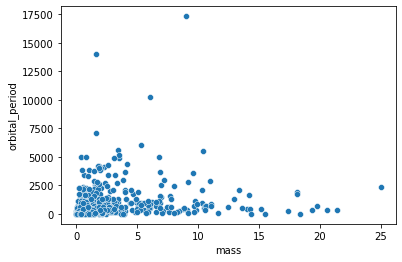

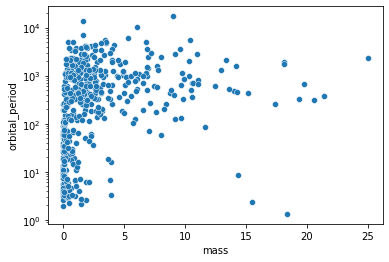

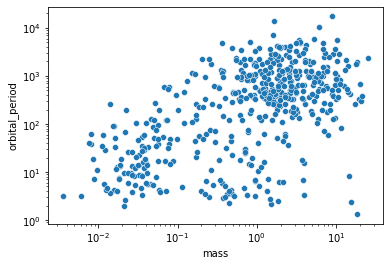

In [4]:
# Let's make a scaterplot
sns.scatterplot(data=planets,x='mass',y='orbital_period')

# You can show multiple plots in one cell by calling this inbetween plots
plt.show()

# The planets are very cramped into the lower left corner
# We will try logarithmic scales
sns.scatterplot(data=planets,x='mass',y='orbital_period')
plt.yscale('log')

plt.show()
# logarithmic scales on both axis
sns.scatterplot(data=planets,x='mass',y='orbital_period')
plt.yscale('log')
plt.xscale('log')


## Lineplots
You can make lineplots like this:

<AxesSubplot:xlabel='year', ylabel='passengers'>

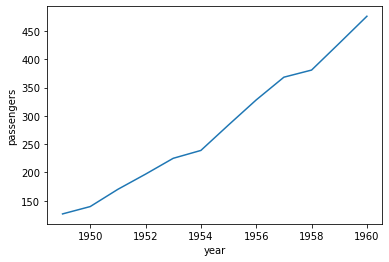

In [5]:
# We load the flights dataset
flights = sns.load_dataset("flights")

# Let's average over all months of each year
flights= flights.groupby('year').mean()

sns.lineplot(data=flights, x='year', y='passengers')

## Plotting Distributions
Seaborn has a variety of different functions to plot distributions.
Most of them are described [here](https://seaborn.pydata.org/tutorial/distributions.html).
Have a look and play with them using the penguin dataset, or others.
Can you e.g. find out whether the distribution of flipper lengths of Adelie penguins differs depending on which island they live on?

Have a look at this [function](https://seaborn.pydata.org/generated/seaborn.jointplot.html) as well.

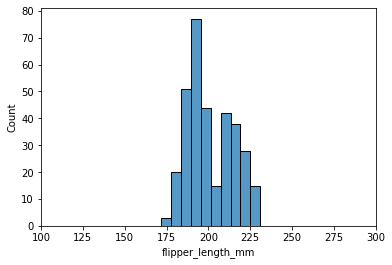

In [6]:
# We load the penguins dataset
penguins = sns.load_dataset("penguins").dropna()

# # We make a histogram plot
# sns.histplot(data = penguins, x = 'flipper_length_mm')
# plt.show()


# # stat= 'density' makes sure it is normalised as PDF
# sns.histplot(data = penguins, x = 'flipper_length_mm', stat= 'density')
# plt.show()


# bins= sets the number of bins
# sns.histplot(data = penguins, x = 'flipper_length_mm', stat= 'density', bins= 150)
# plt.show()


# # bins= sets the number of bins
# sns.histplot(data = penguins, x = 'flipper_length_mm', stat= 'density', bins= 5)
# plt.show()


sns.histplot(data = penguins, x = 'flipper_length_mm')
# we can use this to set the xrange 
plt.xlim(100,300)
plt.show()

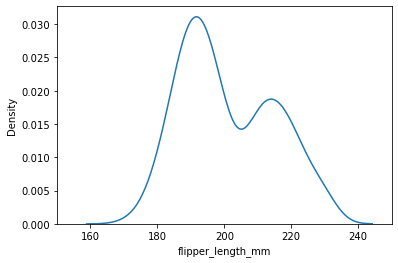

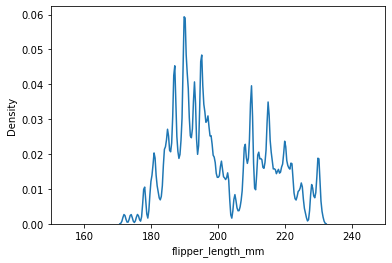

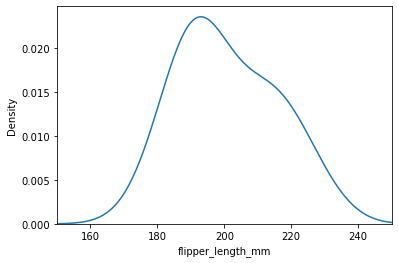

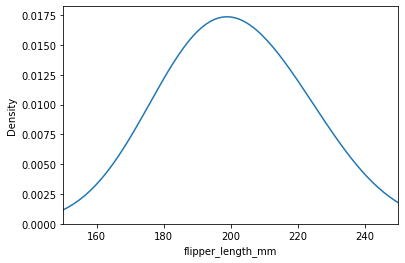

In [7]:
# We make a KDE plot
sns.kdeplot(data = penguins, x = 'flipper_length_mm')
plt.xlim(150,250)
plt.show()

# 'bw_adjust =' changes the band width parameter
# the value is multiplied
sns.kdeplot(data = penguins, x = 'flipper_length_mm', bw_adjust = 0.1)
plt.xlim(150,250)
plt.show()

# 'bw_adjust =' changes the band width parameter
# the value is multiplied
sns.kdeplot(data = penguins, x = 'flipper_length_mm', bw_adjust = 2)
plt.xlim(150,250)
plt.show()

# 'bw_adjust =' changes the band width parameter
# the value is multiplied
sns.kdeplot(data = penguins, x = 'flipper_length_mm', bw_adjust = 4)
plt.xlim(150,250)
plt.show()

## Plotting a Normal Distribution

In [8]:
mi = 100
ma = 300
inc = 1

# This produces an array of numbers between mi and ma, incremented by inc
x = np.arange(mi, ma, inc)

# Lets output the numbers
x

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203,
       204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
       217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229,
       230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242,
       243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255,
       256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268,
       269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 28

In [9]:
mean = 200
std= 20

# This will calculate the pdf values of a Gaussian
y_pdf = normpdf(x, sd=std, mean= mean)

# Lets output the numbers
y_pdf

# If we like, we can modify the numbers by, adding subtrac, etc... 
y_mod = y_pdf*0.4

<AxesSubplot:>

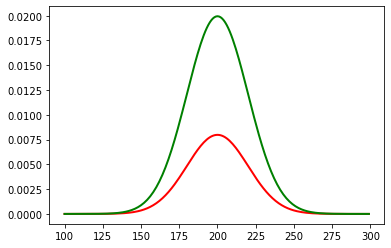

In [10]:
# Now lets plot the distribution
sns.lineplot(x=x, y=y_mod, lw=2, color='red')
sns.lineplot(x=x, y=y_pdf, lw=2, color='green')

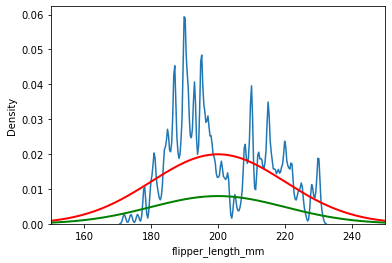

In [11]:
# We can overlay it on another plot like this
sns.kdeplot(data = penguins, x = 'flipper_length_mm', bw_adjust = 0.1)
sns.lineplot(x=x, y=y_pdf, lw=2, color='red')


# Lets overlay the modified version as well
sns.lineplot(x=x, y=y_mod, lw=2, color='green')

plt.xlim(150,250)
plt.show()


---

# Excercises

# Excercise 1
The file `datasets.csv` contains six datasets of corresponding `x` and `y` values.
The `y` values have been calculated from the `x` values using different functions.
* Two of the datasets use a quadratic function $y=ax^2$.
* Two of the datasets use an exponential function $y=ab^x$.
* One of the datasets uses a cubic function $y=ax^3$.
* One dataset uses a function of the form $\frac{a}{x}$ 

Which one of the datasets belongs to which function?
Please derive the solution graphically.

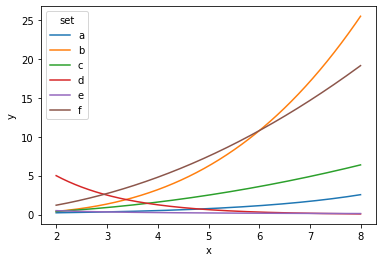

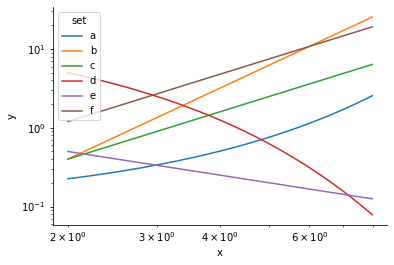

In [12]:
# We read the file
data=pd.read_csv('datasets.csv')

# Please implement

sns.lineplot(data=data, x='x', y='y',hue='set')
plt.show()

sns.lineplot(data=data,x='x', y='y', hue= 'set')
plt.xscale('log')
plt.yscale('log')
sns.despine()

# Excercise 2
You track the development of four viral online videos as they accumulate views.
The file `videos.csv` contains the time in hours (`time (h)` column) since you started logging the accumulated views (`views` column).
The name of the video is contained in the `video` column.

Which type of mathematical function describes the accumulation of views for each video?
Considering that the videos continue to be viewed and shared in the same way, which video will have the most views after 1000 hours?
Which will have the second, third, and fourth most views?
Can you derive the answer in a purely visual way by making an adequate plot and mentally extrapolating?


In [37]:
# We read the file 
videos=pd.read_csv('videos.csv')

# Please implement.

,hours,views,video
0,1.0,1.0,cats
1,2.0,2.0,cats
2,3.0,2.0,cats
3,4.0,3.0,cats
4,5.0,4.0,cats
...,...,...,...
111,25.0,27951.0,pandas
112,26.0,30746.0,pandas
113,27.0,33820.0,pandas
114,28.0,37202.0,pandas


# Excercise 3
Let $X$ be the random variable representing the `sex` of a penguin, and $S$ the one representing the `species`.
Make a pandas data frame named `jointTable` that corresponds to the estimated (relative frequency) joint probability mass function for these two variables.
Each row should correspond to one entry in the table, i.e., one combination of `sex` and `species`.
The data frame should have one column named `prob` that holds the joint probability and one column named `count` that corresponds to the number of penguins in this category.

To display the joint distribution, you can use `.pivot(columns='species', index='sex', values='prob')` to rearrange the table to the conventional form with rows corresponding to one variable and columns corresponding to the other. See details on the `.pivot` function [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html).
You can visualise this pivoted table using [sns.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html). Set `annot=True` to display the numbers. Use `vmin`, `vmax` to adjust the min max of the colour map.

In [13]:
# Please implement

# Excercise 4
Use the joint table form Excercise 3 to compute
* the marginal distributions $p(x)$ and $p(s)$.
* the conditional distributions $p(s|x)$ given $X=$ Male and $X=$ Female.

Show all these distributions using bar plots.

Tip: To extract a single value from your marginal distributions, first extract the desired row using `.loc[...]`.

In [14]:
# Please implement

# Excercise 5
Let $M$ be the continuous random variable corresponding the `body_mass_g`.
Make a [histogram plot](https://seaborn.pydata.org/generated/seaborn.histplot.html) or a [KDE plot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) showing the conditional probability distribution $p(m|S=$Gentoo$)$.

Use `plt.xlim(3200,6800)` to fix the x-range.

In [15]:
# Please implement

# Excercise 6
Make a [histogram plot](https://seaborn.pydata.org/generated/seaborn.histplot.html) or [KDE plot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) overlaying the conditional probability distributions
* $p(m|X=$Female$, S=$Gentoo$ )$.
* $p(m|X=$Male$, S=$Gentoo$ )$.

What is the correct setting for the `common_norm` parameter?

Use `plt.xlim(3200,6800)` to fix the x-range.

In [16]:
# Please implement

# Excercise 7
Assume that the distributions $p(m|X=$Female$, S=$Gentoo$ )$ and $p(m|X=$Male$, S=$Gentoo$ )$ are normal distributions.
Estimate their parameters from the data.
Plot the resulting PDFs overlayed on top of the corresponding histogram/KDE plots for the respective distribution.

Use `plt.xlim(3200,6800)` to fix the x-range.

In [17]:
# Please implement

# Excercise 8
Using your joint distribution table from Excercise 3 and your two Gaussian distributions from Excercise 7, how can you compute the PDF for the distribution $p(m| S=$Gentoo$)$?

Plot this computed distribution over the corresponding KDE/Histogram plot.
Use `plt.xlim(3200,6800)` to fix the x-range.

In [18]:
# Please implement